# Big Sales Mart

Decision Trees

Random Forest

Bagging & Boosting

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset

train = pd.read_csv("~/Downloads/train-file.csv")

In [4]:
# Look into the structure and dimensions of the dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Price_Per_Unit               8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


In [81]:
train.shape # No of Rows and Columns 

(8523, 13)

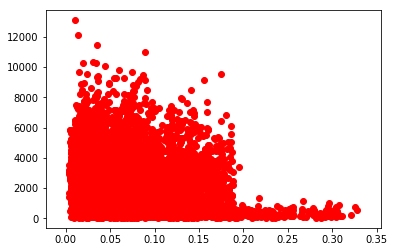

In [82]:
# Create some plots
plt.scatter(train["Item_Visibility"], train["Item_Outlet_Sales"], color="red") # 

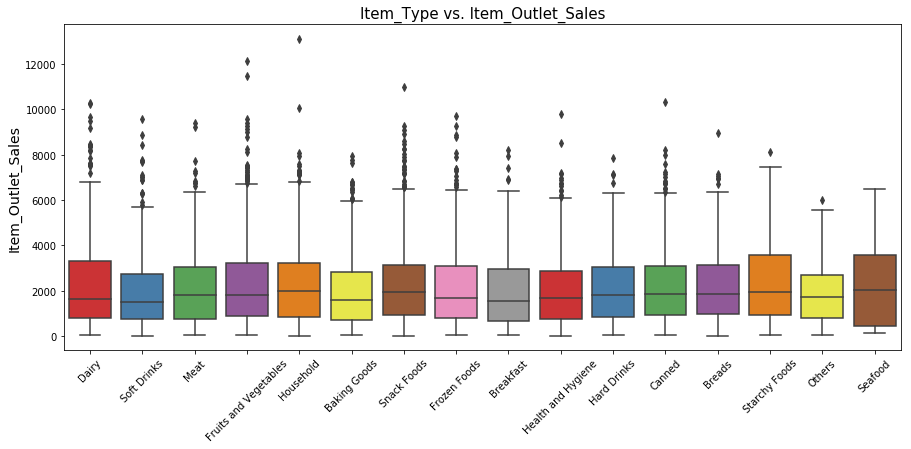

In [83]:
# create a boxplot
plt.figure(figsize = (15,6))
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Item_Outlet_Sales", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

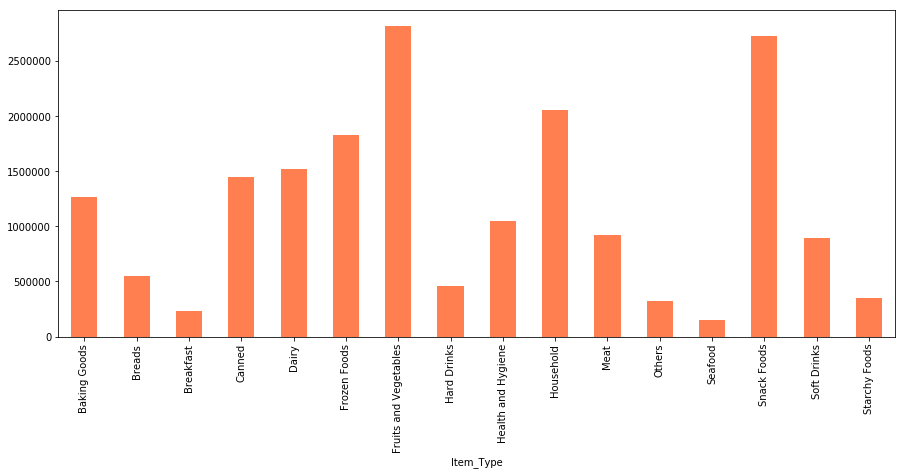

In [84]:
# Barplot of Item Type Vs Sales
plt.figure(figsize=(15,6))
plot = train.groupby("Item_Type")["Item_Outlet_Sales"].sum().plot.bar(color="coral")

In [5]:
# Drop Na
newtrain = train.dropna()

In [6]:
newtrain.shape

(4650, 12)

In [7]:
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [9]:
# is the average MRP and Sales Avg Same

# H0: Avg MRP and Avg Sales is same
# H1: Avg MRP & Avg Sales is not same.

import scipy.stats as stats
stats.ttest_rel(newtrain.Item_MRP, newtrain.Item_Outlet_Sales)

# Since the PValue is 0 and hence it is clear that the Average MRP and Avg Sales is not same.

Ttest_relResult(statistic=-99.75424205270768, pvalue=0.0)

In [13]:
# Is there any relation between Item Fat Content and Products Sold

# Ho: The Item Fat Content & Products Sold are Independent of Each Other.
# H1: The Item Fat Content & Products Sold are Dependent
array = pd.crosstab(newtrain.Item_Fat_Content, newtrain.Item_Type)
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)
print(pvalue)


In [17]:
# Lets Extract a New Feature called Perishables and Non Perishables
newtrain.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [18]:
perishables = ["Dairy", "Meat", "Fruits and Vegetables", "Breakfast","Canned",
              "Starchy Foods","Breads", "Seafood"]

In [19]:
def local(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [21]:
newtrain["Category"] = newtrain.Item_Type.apply(local)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishables
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Perishables
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Non Perishables


In [25]:
# Outlet Size and Product Category are not Related.

array = pd.crosstab(newtrain.Outlet_Size, newtrain.Category)
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)

print(pvalue)

In [27]:
# Outlet Size and Item Type

array = pd.crosstab(newtrain.Outlet_Size, newtrain.Item_Type)
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)

print(pvalue) # Outlet Size and Item Type are not Related.

0.9998404540411131


In [28]:
# Is the Sales Dependent on the Outlet Size
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Item_Outlet_Sales ~ Outlet_Size', data=newtrain).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

# Since P value is less than 0.05, hence we can say that Outlet Size has an Impact on Sales

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Size,2.0,3.308241e+07,1.654121e+07,7.391908,0.000623
Residual,4647.0,1.039880e+10,2.237745e+06,NaN,NaN


In [30]:
# Lets Find out if the Location Type has an Impact on the Sales

model = ols('Item_Outlet_Sales ~ Outlet_Size + Outlet_Location_Type+Outlet_Type', data=newtrain).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Size,2.0,3.308241e+07,1.654121e+07,7.438720,5.950693e-04
Outlet_Location_Type,2.0,6.988647e+07,3.494324e+07,15.714268,1.578936e-07
Outlet_Type,1.0,4.058706e+05,4.058706e+05,0.182523,6.692334e-01
Residual,4645.0,1.032891e+10,2.223663e+06,NaN,NaN
